In [8]:
from IPython.display import clear_output
import cv2
import numpy as np
import time
import torch
from PIL import Image
import os

In [9]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5x', pretrained=True)
model.conf = 0.5
model.classes = [0]
model.names = ['face']
model.eval()

Using cache found in C:\Users\minht/.cache\torch\hub\ultralytics_yolov5_master


ImportError: cannot import name 'AutoShape' from 'models.common' (d:\Study\FPTU\Season5\CPV301\Code\Assigment\yoloface\models\common.py)

In [ ]:
database_folder = "database"  # Folder containing the image database with subfolders for labels
output_folder = "train"  # Output f

In [ ]:
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

In [ ]:
image_path = os.path.join(database_folder, 'Tienpm\\Tienpm_66.jpg')

In [ ]:
img = cv2.imread(image_path)
img.shape

(480, 640, 3)

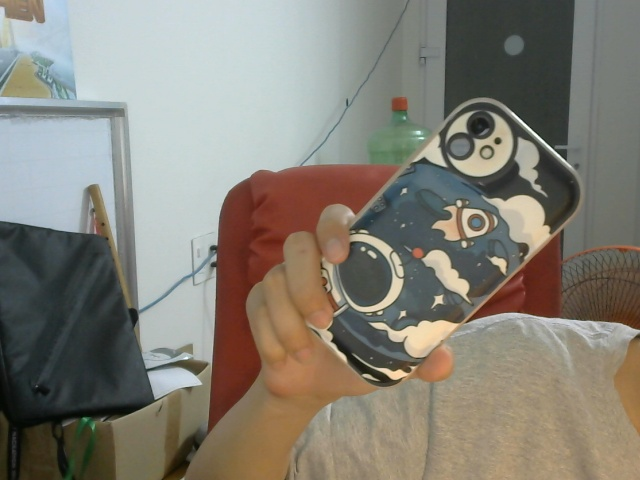

In [ ]:
image_pil = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
image_pil

In [ ]:
# Run inference
results = model(image_pil)
print(results.xyxy)

# Results is a list of dictionaries, one dictionary for each detected face
for result in results.xyxy[0]:
    # Get the bounding box coordinates of the face
    x1, y1, x2, y2 = result[:4].tolist()
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
    
    # Crop the detected face image from the input image
    face_image = image_pil.crop((x1, y1, x2, y2))
    
    # Draw a bounding box rectangle and label on the image
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(img, 'Tienpm', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)



[tensor([[1.84003e+02, 1.62755e+02, 6.38002e+02, 4.75361e+02, 5.12863e-01, 0.00000e+00]])]


In [ ]:
# crop face
boxes = results.xyxy[0].numpy()[0][:4]
confidences = results.xyxy[0].numpy()[:, 4]
class_labels = results.xyxy[0].numpy()[:, 5]
boxes

array([        184,      162.76,         638,      475.36], dtype=float32)

In [ ]:
boxes = boxes.astype(int)
boxes, confidences, class_labels

(array([184, 162, 638, 475]),
 array([    0.51286], dtype=float32),
 array([          0], dtype=float32))

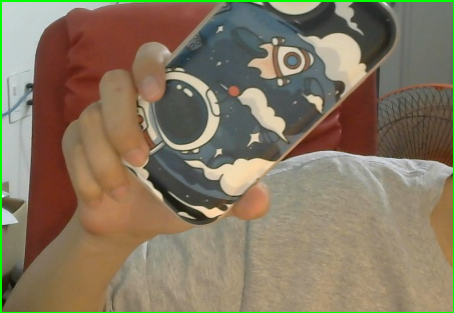

In [ ]:
x_min, y_min, x_max, y_max = boxes
face_image = img[y_min:y_max, x_min:x_max]
face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB)
face_image_pil = Image.fromarray(face_image)
face_image_pil

In [65]:
import os
import cv2
import torch
from PIL import Image
from face_detector import YoloDetector
import numpy as np

# yolo-face
model = YoloDetector(target_size=720, device='cpu', min_face=90)

path = os.getcwd() + '\database'
des_path = os.getcwd() + '\\train'

# Create the output folder if it doesn't exist
if not os.path.exists(des_path):
    os.makedirs(des_path)

# Process each subfolder in the image database (each subfolder represents a label)
for label in os.listdir(path):
    label_folder = os.path.join(path, label)

    # Create a folder for the current label in the output folder
    output_label_folder = os.path.join(des_path, label)
    os.makedirs(output_label_folder, exist_ok=True)
    
    for label_file in os.listdir(label_folder):
        image_path = os.path.join(label_folder, label_file)
        
        # Load the input image using OpenCV
        orgimg = np.array(Image.open(image_path))
        orgimg = cv2.cvtColor(orgimg, cv2.COLOR_BGR2RGB)
        bboxes,points = model.predict(orgimg)
        bboxes = np.array(bboxes)
        try: 
            x_min, y_min, x_max, y_max = bboxes[0][0][:4]
        except:
            continue
        face_image = orgimg[y_min:y_max, x_min:x_max]
        face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB)
        face_image_pil = Image.fromarray(face_image)
        face_image_pil.save(os.path.join(output_label_folder, label_file))
        print("Saved image: ", os.path.join(output_label_folder, label_file))  
 


cpu
d:\Study\FPTU\Season5\CPV301\Code\Assigment\yoloface\weights/yolov5n_state_dict.pt
Saved image:  d:\Study\FPTU\Season5\CPV301\Code\Assigment\yoloface\train\Duongtq\Duongtq_1.jpg
Saved image:  d:\Study\FPTU\Season5\CPV301\Code\Assigment\yoloface\train\Duongtq\Duongtq_10.jpg
Saved image:  d:\Study\FPTU\Season5\CPV301\Code\Assigment\yoloface\train\Duongtq\Duongtq_11.jpg
Saved image:  d:\Study\FPTU\Season5\CPV301\Code\Assigment\yoloface\train\Duongtq\Duongtq_12.jpg
Saved image:  d:\Study\FPTU\Season5\CPV301\Code\Assigment\yoloface\train\Duongtq\Duongtq_13.jpg
Saved image:  d:\Study\FPTU\Season5\CPV301\Code\Assigment\yoloface\train\Duongtq\Duongtq_14.jpg
Saved image:  d:\Study\FPTU\Season5\CPV301\Code\Assigment\yoloface\train\Duongtq\Duongtq_15.jpg
Saved image:  d:\Study\FPTU\Season5\CPV301\Code\Assigment\yoloface\train\Duongtq\Duongtq_16.jpg
Saved image:  d:\Study\FPTU\Season5\CPV301\Code\Assigment\yoloface\train\Duongtq\Duongtq_17.jpg
Saved image:  d:\Study\FPTU\Season5\CPV301\Code\As